In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


#### Image Parameters

In [3]:
# With image dimensions 5184 x 5184 we run into oom error
batch_size = 32
img_height = 256
img_width = 256
img_channels = 3

In [4]:
train_split_test_dir='../0. Project Data/Reshaped zero-padded and split data'

In [5]:
train_ds = image_dataset_from_directory(
    train_split_test_dir + '/train',
    image_size=(img_width, img_height),
    batch_size=batch_size)
val_ds = image_dataset_from_directory(
    train_split_test_dir + '/val',
    image_size=(img_width, img_height),
    batch_size=batch_size)
test_ds = image_dataset_from_directory(
    train_split_test_dir + '/test',
    image_size=(img_width, img_height),
    batch_size=batch_size)

Found 2678 files belonging to 4 classes.
Found 667 files belonging to 4 classes.
Found 843 files belonging to 4 classes.


In [6]:
# enginerring more data by applying randomized horizontal flips, zooms(+/- 20%), and rotates (+/- 10%)
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2),])

In [7]:
inputs = keras.Input(shape=(img_height, img_width, img_channels))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                             

In [9]:
model.compile(optimizer='sgd', # Common optimizers include 'adam', 'sgd', and 'rmsprop'.
 loss='sparse_categorical_crossentropy', # Common loss functions include 'binary_crossentropy', 'categorical_crossentropy', and 'mse'.
 metrics=["accuracy"]) #Common metrics include 'accuracy', 'precision', 'recall', and 'f1_score'.

In [12]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100
84/84 [==============================] - 21s 244ms/step - loss: 0.2864 - accuracy: 0.8925 - val_loss: 0.2626 - val_accuracy: 0.8951
Epoch 2/100
84/84 [==============================] - 21s 246ms/step - loss: 0.4245 - accuracy: 0.8417 - val_loss: 0.3760 - val_accuracy: 0.8606
Epoch 3/100
84/84 [==============================] - 21s 248ms/step - loss: 0.4012 - accuracy: 0.8361 - val_loss: 0.3019 - val_accuracy: 0.8786
Epoch 4/100
84/84 [==============================] - 21s 245ms/step - loss: 0.3648 - accuracy: 0.8555 - val_loss: 0.3197 - val_accuracy: 0.8741
Epoch 5/100
84/84 [==============================] - 21s 246ms/step - loss: 0.3286 - accuracy: 0.8663 - val_loss: 0.2755 - val_accuracy: 0.8906
Epoch 6/100
84/84 [==============================] - 21s 250ms/step - loss: 0.3122 - accuracy: 0.8704 - val_loss: 0.2841 - val_accuracy: 0.8846
Epoch 7/100
84/84 [==============================] - 21s 245ms/step - loss: 0.2984 - accuracy: 0.8768 - val_loss: 0.2801 - val_accuracy:

84/84 [==============================] - 21s 247ms/step - loss: 0.1401 - accuracy: 0.9481 - val_loss: 0.2557 - val_accuracy: 0.9160
Epoch 58/100
84/84 [==============================] - 21s 245ms/step - loss: 0.1557 - accuracy: 0.9417 - val_loss: 0.2746 - val_accuracy: 0.9040
Epoch 59/100
84/84 [==============================] - 21s 246ms/step - loss: 0.1488 - accuracy: 0.9369 - val_loss: 0.2312 - val_accuracy: 0.9295
Epoch 60/100
84/84 [==============================] - 21s 251ms/step - loss: 0.1523 - accuracy: 0.9440 - val_loss: 0.2268 - val_accuracy: 0.9280
Epoch 61/100
84/84 [==============================] - 21s 249ms/step - loss: 0.1489 - accuracy: 0.9462 - val_loss: 0.2354 - val_accuracy: 0.9190
Epoch 62/100
84/84 [==============================] - 21s 247ms/step - loss: 0.3156 - accuracy: 0.9134 - val_loss: 0.3732 - val_accuracy: 0.8696
Epoch 63/100
84/84 [==============================] - 21s 249ms/step - loss: 0.2704 - accuracy: 0.8973 - val_loss: 0.2583 - val_accuracy: 0.914

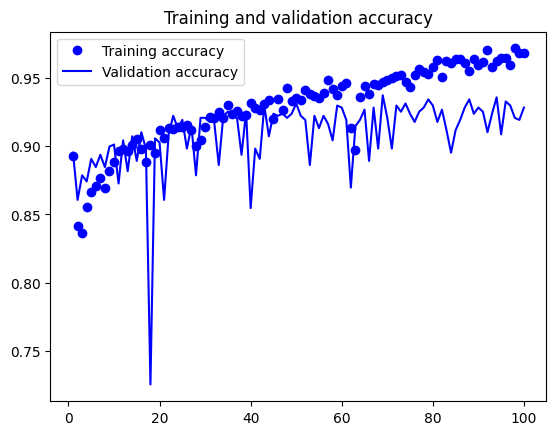

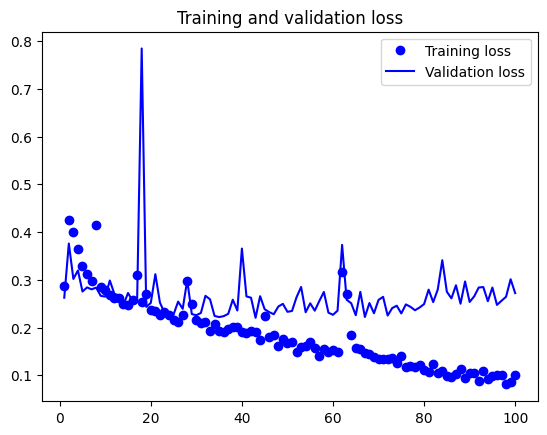

In [13]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()